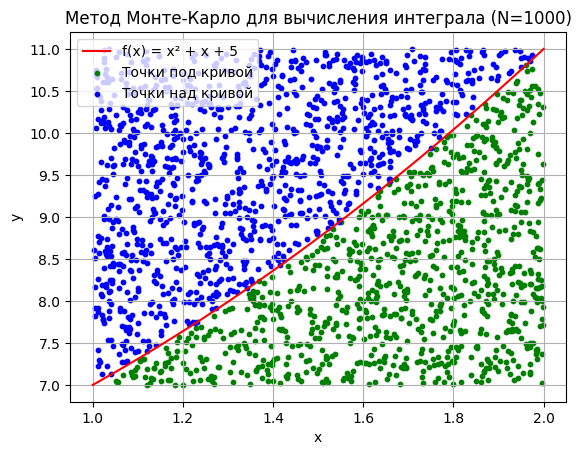

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры
N = 2000  # Количество точек
a, b = 1, 2  # Границы интегрирования
f_min, f_max = 7, 11  # Минимальное и максимальное значение функции на отрезке [1, 2]

# Функция
def f(x):
    return x**2 + x + 5

# Генерация случайных точек
np.random.seed(42)  # Для воспроизводимости
x_points = np.random.uniform(a, b, N)
y_points = np.random.uniform(f_min, f_max, N)

# Определяем, какие точки под графиком
below_curve = y_points <= f(x_points)
above_curve = ~below_curve

# Построение графика
# 1. График функции
x_curve = np.linspace(a, b, 100)
y_curve = f(x_curve)
plt.plot(x_curve, y_curve, 'r-', label='f(x) = x² + x + 5')

# 2. Точки под графиком (зелёные)
plt.scatter(x_points[below_curve], y_points[below_curve], color='green', s=10, label='Точки под кривой')

# 3. Точки над графиком (синие)
plt.scatter(x_points[above_curve], y_points[above_curve], color='blue', s=10, label='Точки над кривой')

# Настройки графика
plt.title('Метод Монте-Карло для вычисления интеграла (N=1000)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

# Сохранение графика
plt.savefig('monte_carlo_integral.png')

Равномерное распределение:
N		Точек под кривой	Значение интеграла
10		4			8.600
20		10			9.000
40		18			8.800
80		31			8.550
160		71			8.775
320		134			8.675
640		299			8.869
1280		583			8.822
2560		1208			8.887
5120		2314			8.808
10240		4723			8.845
20480		9312			8.819
40960		18568			8.813
81920		37461			8.829
163840		75152			8.835
327680		150461			8.837
655360		300356			8.833

Биномиальное распределение:
N		Точек под кривой	Значение интеграла
10		2			7.800
20		9			8.800
40		23			9.300
80		34			8.700
160		78			8.950
320		147			8.838
640		309			8.931
1280		584			8.825
2560		1189			8.858
5120		2352			8.838
10240		4681			8.829
20480		9403			8.837
40960		18874			8.843
81920		37454			8.829
163840		75152			8.835
327680		150556			8.838
655360		300227			8.832

Среднее значение интеграла (равномерное): 8.833
Среднее значение интеграла (биномиальное): 8.832
Разница между значениями интеграла: 0.001
Приближённое значение интеграла (N=1000): 8.823


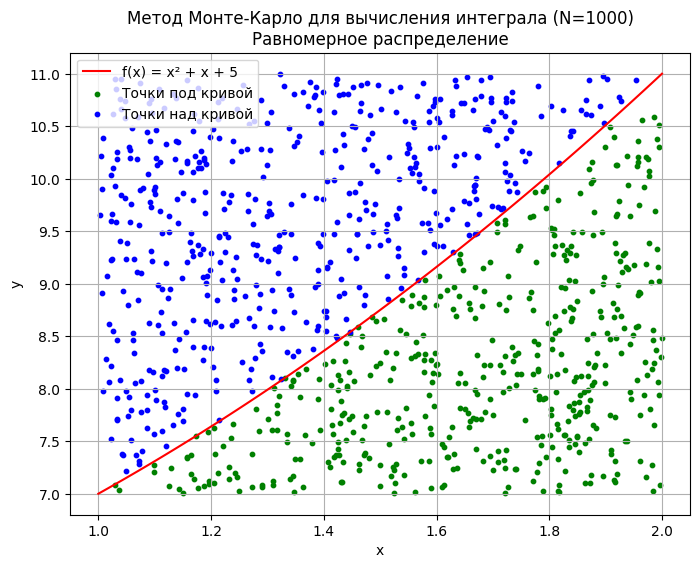

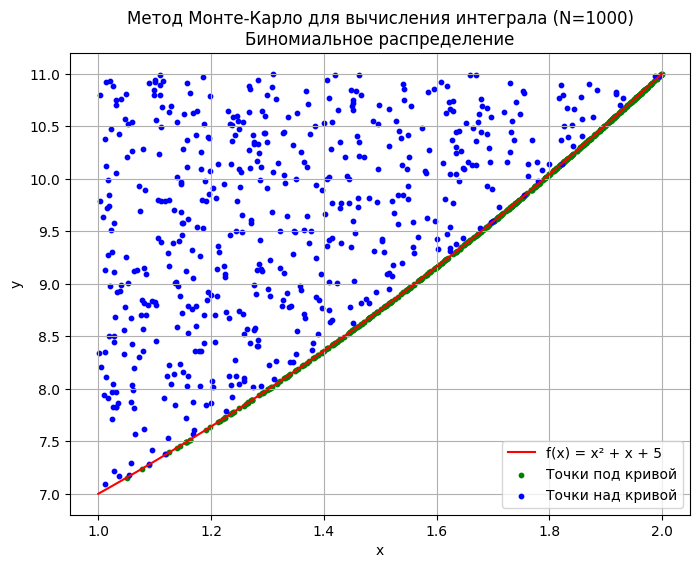

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры
a, b = 1, 2  # Границы интегрирования
f_min, f_max = 7, 11  # Минимальное и максимальное значение функции
N_values = [10, 20, 40, 80, 160, 320, 640, 1280, 2560, 5120, 10240, 20480, 40960, 81920, 163840, 327680, 655360]

# Функция
def f(x):
    return x**2 + x + 5

# Точное значение интеграла (для сравнения)
exact_integral = 53 / 6  # 8.8333...

# Функция для метода Монте-Карло с равномерным распределением
def monte_carlo_uniform(N):
    x = np.random.uniform(a, b, N)
    y = np.random.uniform(f_min, f_max, N)
    below_curve = y <= f(x)
    points_below = np.sum(below_curve)
    area = (b - a) * (points_below / N) * (f_max - f_min) + (b - a) * f_min
    return points_below, area, x, y, below_curve

# Функция для метода Монте-Карло с биномиальным распределением
def monte_carlo_binomial(N):
    x = np.random.uniform(a, b, N)
    # Вероятность попадания под график
    p = (f(x) - f_min) / (f_max - f_min)
    # Генерируем биномиальные успехи (1 — под графиком, 0 — над)
    below_curve = np.random.binomial(1, p)
    points_below = np.sum(below_curve)
    # Для корректного соответствия y-координат точкам
    y = below_curve * f(x) + (1 - below_curve) * (f(x) + np.random.uniform(0, f_max - f(x)))
    area = (b - a) * (points_below / N) * (f_max - f_min) + (b - a) * f_min
    return points_below, area, x, y, below_curve

# Симуляции
print("Равномерное распределение:")
print("N\t\tТочек под кривой\tЗначение интеграла")
uniform_results = []
for N in N_values:
    points_below, area, _, _, _ = monte_carlo_uniform(N)
    uniform_results.append((N, points_below, area))
    print(f"{N}\t\t{points_below}\t\t\t{area:.3f}")

print("\nБиномиальное распределение:")
print("N\t\tТочек под кривой\tЗначение интеграла")
binomial_results = []
for N in N_values:
    points_below, area, _, _, _ = monte_carlo_binomial(N)
    binomial_results.append((N, points_below, area))
    print(f"{N}\t\t{points_below}\t\t\t{area:.3f}")

# Среднее значение для N=655360
uniform_avg = uniform_results[-1][2]
binomial_avg = binomial_results[-1][2]
print(f"\nСреднее значение интеграла (равномерное): {uniform_avg:.3f}")
print(f"Среднее значение интеграла (биномиальное): {binomial_avg:.3f}")
print(f"Разница между значениями интеграла: {abs(uniform_avg - binomial_avg):.3f}")
print(f"Приближённое значение интеграла (N=1000): {(uniform_results[7][2] + binomial_results[7][2]) / 2:.3f}")

# График для равномерного распределения (N=1000)
N_plot = 1000
points_below, _, x_points, y_points, below_curve = monte_carlo_uniform(N_plot)
plt.figure(figsize=(8, 6))
x_curve = np.linspace(a, b, 100)
y_curve = f(x_curve)
plt.plot(x_curve, y_curve, 'r-', label='f(x) = x² + x + 5')
plt.scatter(x_points[below_curve], y_points[below_curve], color='green', s=10, label='Точки под кривой')
plt.scatter(x_points[~below_curve], y_points[~below_curve], color='blue', s=10, label='Точки над кривой')
plt.title('Метод Монте-Карло для вычисления интеграла (N=1000)\nРавномерное распределение')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
# plt.savefig('monte_carlo_uniform.png')

# График для биномиального распределения (N=1000)
points_below, _, x_points, y_points, below_curve = monte_carlo_binomial(N_plot)
plt.figure(figsize=(8, 6))
plt.plot(x_curve, y_curve, 'r-', label='f(x) = x² + x + 5')
plt.scatter(x_points[below_curve == 1], y_points[below_curve == 1], color='green', s=10, label='Точки под кривой')
plt.scatter(x_points[below_curve == 0], y_points[below_curve == 0], color='blue', s=10, label='Точки над кривой')
plt.title('Метод Монте-Карло для вычисления интеграла (N=1000)\nБиномиальное распределение')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
# plt.savefig('monte_carlo_binomial.png')